# Zadanie 00 - wprowadzenie
---
Zadania wykonywane podczas laboratoriów będziemy rozwiązywać wykorzystując język **Python 3.0** oraz środowisko Jupyter.

Bardzo istotną cześcią języka Python są biblioteki. W czasie pracy w laboratorium będziemy korzystywać biblioteki:
+ **NumPy** - biblioteka pozwalająca na realizowanie obliczeń algebraicznych, [strona projekty](http://www.numpy.org/) 

+ **matplotlib** - biblioteka pozwalające na rysowanie wykresów funkcji, [strona projekty](https://matplotlib.org/)

Aby zaimportować wspomniane biblioteki należy wykonać poniższy kod

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Od teraz aby odwałać się do *funkcji* z biblioteki numpy należy wykonać kod *np.funckja()*. Podobenie będzie dla boblioteki *matplotlib* z tym że prefixem będzie $plt$



## Rozkład normalny
---
Funkcja gęstości prawdopodobieństwa $$f_{\mu, \sigma}(x) = {1 \over \sigma\sqrt{2\pi} }\,\exp\left(\frac {-(x-\mu )^2} {2\sigma^2}\right)$$ gdzie $\mu$ to średnia a $\sigma$ to odchylenie standardowe

Wygenerujmy teraz 10000 liczb z rozkładu normalnego z $\mu = 0$ oraz $\sigma = 0.25$

In [4]:
mu, sigma = 0, 0.25
s = np.random.normal(mu, sigma, 10000)

print(s)

[-0.12236702 -0.0177587   0.16207029 ..., -0.38375405  0.42850777
 -0.01861614]


`s` zawiera teraz wektor z wygenerowanymi liczbami (w języku Python a struktura danych nazwa się **listą**). Przedstawmy teraz te liczby w formie histogramu z `30` binami.

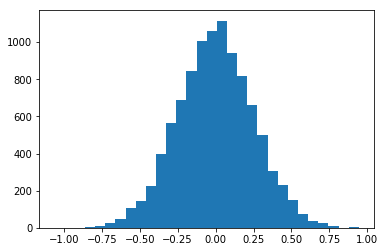

In [8]:
plt.hist(s, 30)
plt.show()

Jaki widać wygenerowane liczby rzeczywiście pochodzą z rozkładu normalnego. Sprawdźmy teraz czy paramtery tego rozkładu są takie jak tego chcieliśmy czyli $\mu = 0$ (średnia) oraz $\sigma = 0.25$ (odchylenie standardowe)

In [9]:
mean = np.mean(s)
mean

-0.00099473143237505655

In [10]:
std = np.std(s)
std

0.25015729592904584

Obliczne wartości nie są identycznej ale bardzo zbliżone do zadanych. Jest to normalne gdyż generato nie jest idealny oraz próbka nie jest duża. Jeżeli będziem zwiększać liczbę wygenerowanych punktów wtedy wartości te będą dążyły do zadanych.

Narysujmy teraz wartości funkcji gęstości dla obliczonych wartości parametrów oraz dla $x \in (-1,1)$.

Napierw stwórzym wektro (tablice 1 wymiarową) `x` z 50 wartościami między $x = -1$ a $x = 1$.

In [11]:
x = np.linspace(-1, 1, 50)
x

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

Na podstawie wzoru na funkcje gęstości obliczbym wartości `y`

In [12]:
y = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-np.power(x-mu, 2) / (2*np.power(sigma,2)))
y

array([  5.35320903e-04,   1.01495528e-03,   1.87371377e-03,
         3.36808643e-03,   5.89504120e-03,   1.00464840e-02,
         1.66711282e-02,   2.69363979e-02,   4.23777295e-02,
         6.49171564e-02,   9.68288844e-02,   1.40628714e-01,
         1.98868831e-01,   2.73831291e-01,   3.67132696e-01,
         4.79277113e-01,   6.09219723e-01,   7.54023456e-01,
         9.08697629e-01,   1.06629549e+00,   1.21831442e+00,
         1.35539174e+00,   1.46822943e+00,   1.54862637e+00,
         1.59046095e+00,   1.59046095e+00,   1.54862637e+00,
         1.46822943e+00,   1.35539174e+00,   1.21831442e+00,
         1.06629549e+00,   9.08697629e-01,   7.54023456e-01,
         6.09219723e-01,   4.79277113e-01,   3.67132696e-01,
         2.73831291e-01,   1.98868831e-01,   1.40628714e-01,
         9.68288844e-02,   6.49171564e-02,   4.23777295e-02,
         2.69363979e-02,   1.66711282e-02,   1.00464840e-02,
         5.89504120e-03,   3.36808643e-03,   1.87371377e-03,
         1.01495528e-03,

Przedstawmy obliczone wartości funkcji gęstości na wykresie waraz z histogramem. Z racji, że funkcja gęstości jest unormowana należy również unormować histogram.

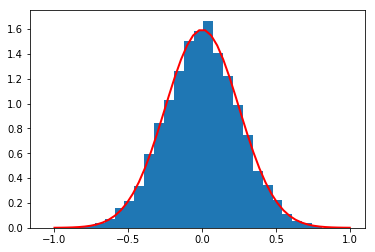

In [15]:
plt.hist(s, 30, normed=True)
plt.plot(x, y, linewidth=2, color='r')
plt.show()

## Rozkład normalny dwuwymiarowy
---
Funkcja gęstości prawdkopodobieństwa $$f_{\boldsymbol{\mu}, \Sigma}(X)= \frac {1}{2\pi \sqrt{\left|\Sigma\right|}} \exp\left( -\frac{1}{2} (X - \boldsymbol{\mu})^T \Sigma^{-1} (X - \boldsymbol{\mu})\right)$$ gdzie $\mu$ to średnia a $\Sigma$ to macierz kowariancji

Wygenerujmy teraz dwa wektory po 10000 z rozkładu normalnego

In [16]:
s1 = np.random.normal(mu, sigma, 10000)
s2 = np.random.normal(mu, sigma, 10000)

Połącznym te dwa wektory w tablice dwuwymiarową `s`

In [17]:
s = np.array([s1, s2])
s

array([[ 0.48467698,  0.17897198, -0.36078515, ..., -0.19077971,
         0.36501219, -0.4095477 ],
       [-0.01890738,  0.41777941, -0.09757258, ..., -0.18215404,
         0.26631195,  0.15756721]])

Obliczmy średnią oraz macierz kowariancji

In [21]:
mean = np.mean(s, axis=1)
mean

array([ 0.00091424, -0.00115045])

In [19]:
cov = np.cov(s)
cov

array([[ 0.06373992, -0.00024915],
       [-0.00024915,  0.06177574]])

Podobnie jak w przypadku jednowymiarowym obliczmy teraz wartości gęstości prawdopodobieństwa na podstawie przedstawionego wzoru.

Na początku stwórzmy siatkę dla której będziemy liczyć wartości funkcji

In [22]:
x = np.linspace(-1, 1, 40)
y = np.linspace(-1, 1, 40)
X, Y = np.meshgrid(x, y)

Zwizualizujmy tą siatkę

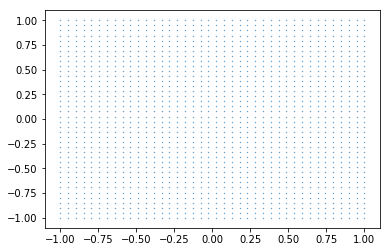

In [23]:
plt.scatter(X,Y, s=0.1)
plt.show()

Obliczmy wartości funkcji

In [30]:
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        x_temp = np.array([X[i,j], Y[i,j]])
        Z[i,j] = np.exp(-0.5 * (x_temp - mean).T @ np.linalg.inv(cov) @ (x_temp - mean))

Z *= 1/(2*np.pi * np.sqrt(np.linalg.det(cov)))

Przedstawmy otrzymane wyniki na wykresie 3D

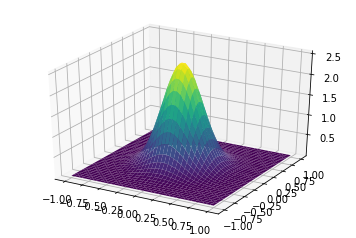

In [36]:
# from mpl_toolkits.mplot3d import axes3d

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

plt.show()

Inne wersje wykresów

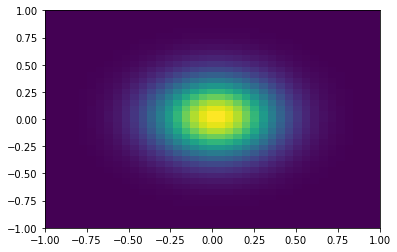

In [32]:
plt.pcolor(X, Y, Z)
plt.show()

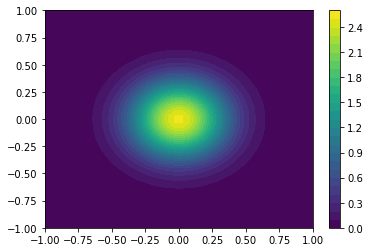

In [37]:
plt.contourf(X, Y, Z, 30)
plt.colorbar()
plt.show()

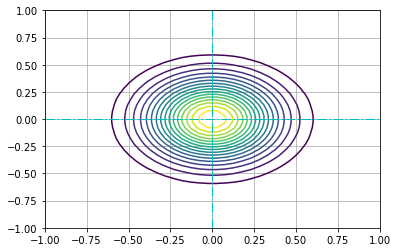

In [45]:
plt.contour(X,Y,Z, 20)
plt.axhline(y=0,color='c' , linestyle = '-.', linewidth = 1)
plt.axvline(x=0,color='c' , linestyle = '-.', linewidth = 1)
plt.grid()
plt.show()